In [171]:
#Import Modules
import datacube
import datetime
import fiona
import geopandas as gpd
import numpy as np
import pandas as pd
import rasterio.mask
import rasterio.features
from shapely import geometry
import seaborn as sns
import sys
import xarray as xr

import matplotlib.dates as mdates
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt

import skimage
import cv2

from datacube.storage import masking
from datacube.utils import geometry
from datacube.helpers import ga_pq_fuser, write_geotiff
from datacube.helpers import write_geotiff

sys.path.append('/g/data/u46/users/ck9738/10_Scripts')
import TasseledCapTools

from datacube.virtual import construct_from_yaml

dc = datacube.Datacube()


%load_ext autoreload

%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [172]:
from wofs import filters
from scipy import ndimage

In [173]:


query = {'y': (-36.900, -36.988),
'x': (149.800, 149.925),  
    
'time': ('2018-01-01', '2018-03-30'),
'crs': 'EPSG:4326',
'output_crs': 'EPSG: 3577',
'resolution': (-25, 25)
}

product = construct_from_yaml("""
    juxtapose:
        - product: ls8_nbart_albers
        - product: wofs_albers
        - product: ls8_pq_albers
        
""")

data = product.load(dc, **query)

not_steep_pix = (data.water & np.uint8(0b01111011)) == 0

In [174]:
data

<xarray.Dataset>
Dimensions:          (time: 15, x: 498, y: 449)
Coordinates:
  * time             (time) datetime64[ns] 2018-01-03T23:45:03 ... 2018-03-15T23:50:39
  * y                (y) float64 -4.144e+06 -4.144e+06 ... -4.155e+06 -4.155e+06
  * x                (x) float64 1.585e+06 1.585e+06 ... 1.597e+06 1.597e+06
Data variables:
    coastal_aerosol  (time, y, x) int16 262 271 276 294 ... 3998 3839 3601 3356
    blue             (time, y, x) int16 208 213 220 230 ... 3788 3593 3361 3143
    green            (time, y, x) int16 291 291 306 312 ... 3788 3581 3332 3079
    red              (time, y, x) int16 253 271 291 311 ... 3829 3654 3374 3091
    nir              (time, y, x) int16 1803 1711 1746 1798 ... 3851 3584 3276
    swir1            (time, y, x) int16 1082 1017 1138 1243 ... 3693 3408 3110
    swir2            (time, y, x) int16 507 491 556 599 ... 3520 3442 3166 2845
    water            (time, y, x) int16 0 0 0 0 0 0 0 0 ... 68 68 68 68 68 68 68
    pixelquality     (

In [158]:
not_steep_pix = (data.water & np.uint8(0b01111011)) == 0

In [159]:
not_steep_pix.dtype

dtype('bool')

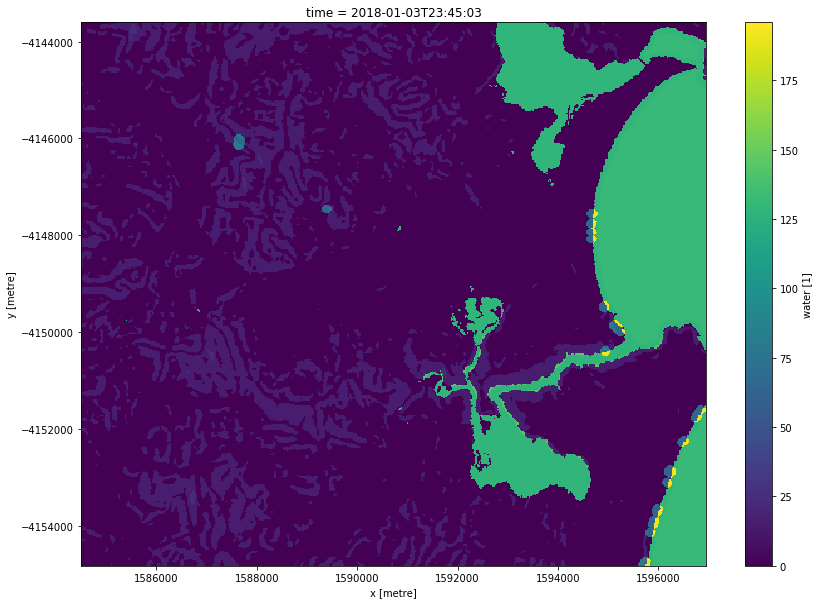

In [170]:
data.water.isel(time=0).plot(figsize =(14,10))

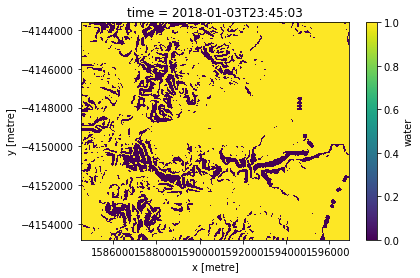

In [161]:
not_steep_pix.isel(time=0).plot()

In [164]:
steep_pix = not_steep_pix.where(not_steep_pix==True,True)
steep_pix = steep_pix.where(not_steep_pix==False,False)
steep_pix = np.array(steep_pix.isel(time=0).astype('bool'))
steep_pix.plot(figsize =(14,10))

AttributeError: 'numpy.ndarray' object has no attribute 'plot'

In [132]:
steep_pix.dtype

dtype('bool')

In [139]:
steep_pix

array([[[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],

       [[False, False, False, ...,  True,  True,  True],
        [False, False, False, ...,  True,  True,  True],
        [False, False, False, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]],

       [[False, False, False, ...,  True,  True,  True],
        [False, False, False, ...,  True,  True,  True],
        [False, False, False, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  Tr

In [167]:
buff_terrain = xr.DataArray(ndimage.binary_dilation(steep_pix, iterations=1).astype(steep_pix.dtype),dims=('y','x'))
not_steep_pix['buff1'] = buff_terrain

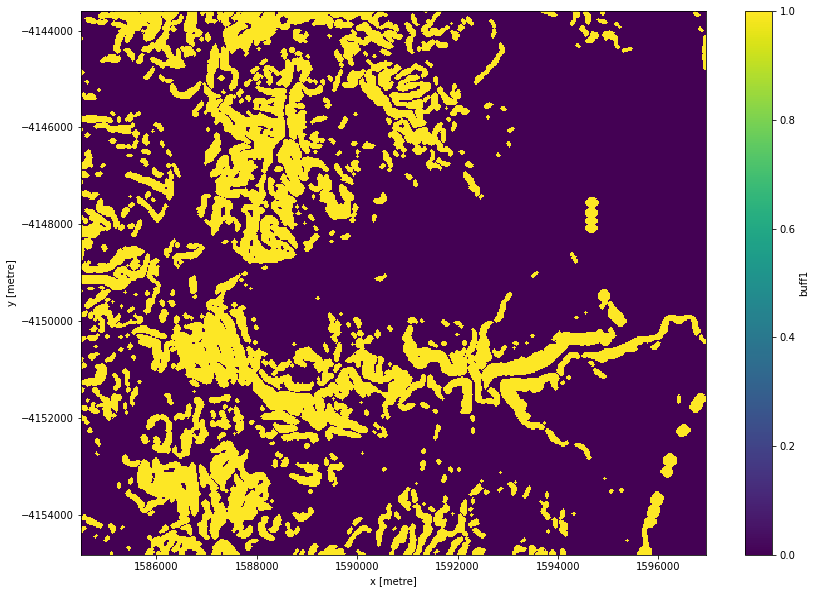

In [169]:
not_steep_pix.buff1.plot(figsize =(14,10))

In [152]:
buff_terrain

<xarray.DataArray (time: 15, y: 449, x: 498)>
array([[[ True,  True, ...,  True,  True],
        [ True,  True, ...,  True,  True],
        ...,
        [ True,  True, ...,  True,  True],
        [ True,  True, ...,  True,  True]],

       [[ True,  True, ...,  True,  True],
        [ True,  True, ...,  True,  True],
        ...,
        [ True,  True, ...,  True,  True],
        [ True,  True, ...,  True,  True]],

       ...,

       [[False, False, ...,  True,  True],
        [False, False, ...,  True,  True],
        ...,
        [ True,  True, ...,  True,  True],
        [ True,  True, ...,  True,  True]],

       [[False, False, ..., False, False],
        [False, False, ..., False, False],
        ...,
        [ True,  True, ..., False, False],
        [ True,  True, ..., False, False]]])
Dimensions without coordinates: time, y, x

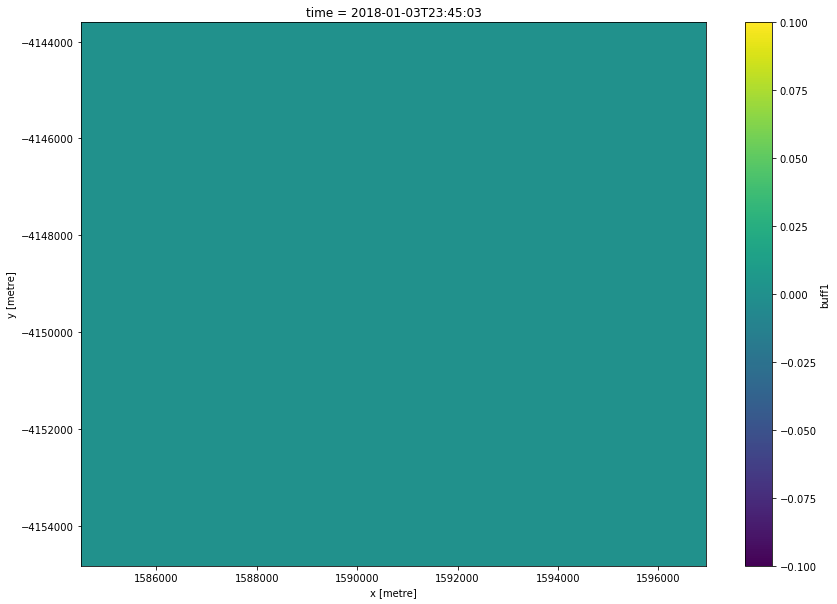

In [145]:
not_steep_pix.buff1.isel(time=0).plot(figsize =(14,10))

error: OpenCV(4.1.1) /io/opencv/modules/imgproc/src/morph.simd.hpp:756: error: (-213:The function/feature is not implemented) Unsupported data type (=4) in function 'getMorphologyRowFilter'


In [84]:
buff_terrain = xr.DataArray(skimage.morphology.binary_dilation(steep_pix),dims=('time','y', 'x'))
not_steep_pix['sheep'] = buff_terrain
not_steep_pix

<xarray.DataArray 'water' (time: 15, y: 449, x: 498)>
array([[[ True,  True, ...,  True,  True],
        [ True,  True, ...,  True,  True],
        ...,
        [ True,  True, ...,  True,  True],
        [ True,  True, ...,  True,  True]],

       [[ True,  True, ..., False, False],
        [ True,  True, ..., False, False],
        ...,
        [False, False, ..., False, False],
        [False, False, ..., False, False]],

       ...,

       [[False, False, ..., False, False],
        [False, False, ..., False, False],
        ...,
        [ True,  True, ..., False, False],
        [ True,  True, ..., False, False]],

       [[False, False, ..., False, False],
        [False, False, ..., False, False],
        ...,
        [False, False, ..., False, False],
        [False, False, ..., False, False]]])
Coordinates:
  * time     (time) datetime64[ns] 2018-01-03T23:45:03 ... 2018-03-15T23:50:39
  * y        (y) float64 -4.144e+06 -4.144e+06 ... -4.155e+06 -4.155e+06
  * x        (x) flo

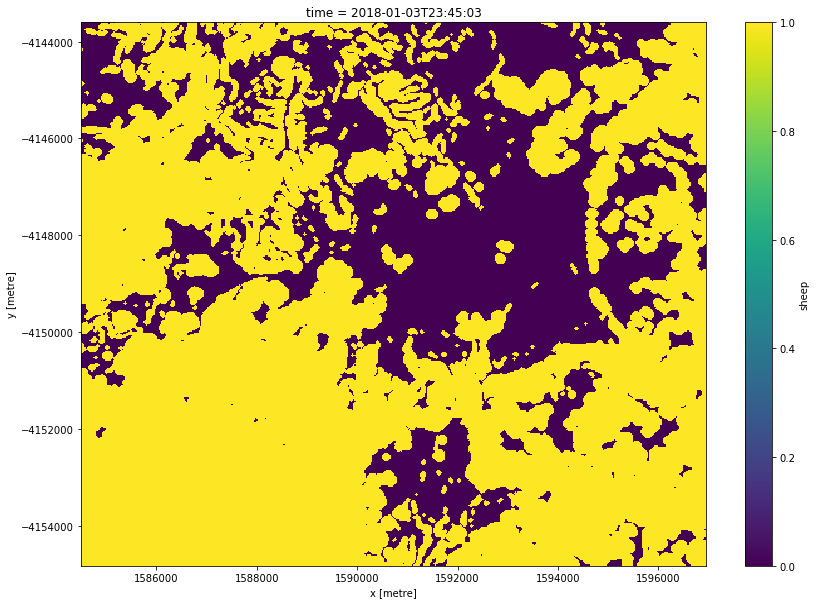

In [85]:
not_steep_pix.sheep.isel(time=0).plot(figsize =(14,10))

In [ ]:
# #define area of interest
# query = { 
   
# 'y': (-36.924, -36.988),
# 'x': (149.848, 149.925),  
    
# 'time': ('2018-06-01', '2018-08-30'),
# 'crs': 'EPSG:4326',
# 'output_crs': 'EPSG: 3577',
# 'resolution': (-25, 25)
# }

In [9]:
# query2 = { 
   
# 'y': (-36.924, -36.988),
# 'x': (149.848, 149.925),  
    
# # 'time': ('2018-01-01', '2018-03-30'),
# 'crs': 'EPSG:4326',
# 'output_crs': 'EPSG: 3577',
# 'resolution': (-25, 25)
# }

In [10]:
# #load data
# data_lst8 = dc.load(dc, **query)
# data_lst8

ValueError: No products match search terms: {'time': Range(begin=datetime.datetime(2018, 6, 1, 0, 0, tzinfo=<UTC>), end=datetime.datetime(2018, 8, 30, 23, 59, 59, 999999, tzinfo=tzutc())), 'lat': Range(begin=-36.988, end=-36.924), 'lon': Range(begin=149.848, end=149.925), 'product': Datacube<index=Index<db=PostgresDb<engine=Engine(postgresql://ck9738@130.56.244.105:6432/datacube)>>>}

In [6]:
#load PG
sensor_pq = dc.load(product='ls8_pq_albers', fuse_func=ga_pq_fuser, group_by='solar_day', **query)
sensor_pq

<xarray.Dataset>
Dimensions:       (time: 11, x: 313, y: 320)
Coordinates:
  * time          (time) datetime64[ns] 2018-06-03T23:49:28 ... 2018-08-22T23:50:11
  * y             (y) float64 -4.147e+06 -4.147e+06 ... -4.155e+06 -4.155e+06
  * x             (x) float64 1.589e+06 1.589e+06 ... 1.597e+06 1.597e+06
Data variables:
    pixelquality  (time, y, x) int16 13311 13311 13311 ... 15871 15871 15871
Attributes:
    crs:      EPSG: 3577

In [7]:
want_to_mask = (data_lst8 == -999).to_array(dim='variables').all(dim='variables')
z = data_lst8.copy(deep=True).where(~want_to_mask, np.NaN)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


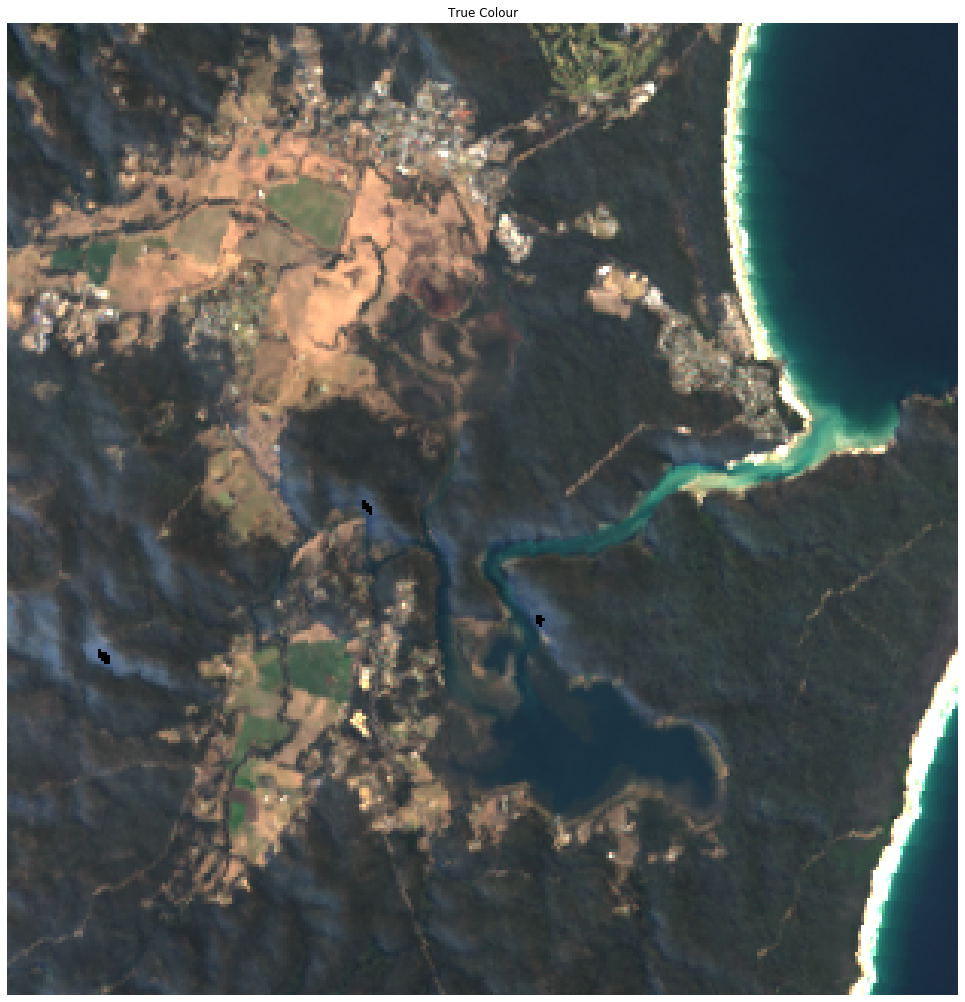

In [8]:
data_lst8_once = data_lst8.isel(time=10)

#Prepare geomedian imagery for plotting

rgb = data_lst8_once.to_array(dim='color').sel(color=[
    'red','green', 'blue']).transpose('y', 'x', 'color')
fake_saturation = 2000.0  #you may need to adjust this to get a clear image. higher numbers will make it darker, 
                                                                            #lower will make it ligher
rgb = rgb.astype('double')
clipped_visible = rgb.where(rgb<fake_saturation).fillna(fake_saturation)
max_val = clipped_visible.max(['y', 'x'])
scaled = (clipped_visible / max_val)

fig = plt.figure(figsize =(15,15)) #edit size of plot 
plt.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.05) #set border dimensions
fig.patch.set_facecolor('white') #make border white 
fig.patch.set_alpha(0.99)#ensure border white
plt.axis('off')#remove axis 
plt.title('True Colour') #add title
plt.imshow(scaled, interpolation = 'nearest') #create image

In [9]:
dsm = dc.load(product='dsm1sv10',**query2)
dsm = dsm.isel(time=0)
dsm

<xarray.Dataset>
Dimensions:    (x: 313, y: 320)
Coordinates:
    time       datetime64[ns] 2000-02-17T08:33:00
  * y          (y) float64 -4.147e+06 -4.147e+06 ... -4.155e+06 -4.155e+06
  * x          (x) float64 1.589e+06 1.589e+06 1.589e+06 ... 1.597e+06 1.597e+06
Data variables:
    elevation  (y, x) float32 111.40662 109.43131 119.75318 ... 0.0 0.0 0.0
Attributes:
    crs:      EPSG: 3577

In [29]:
terrain_mask = filters.terrain_filter(dsm,data_lst8.isel(time=10))

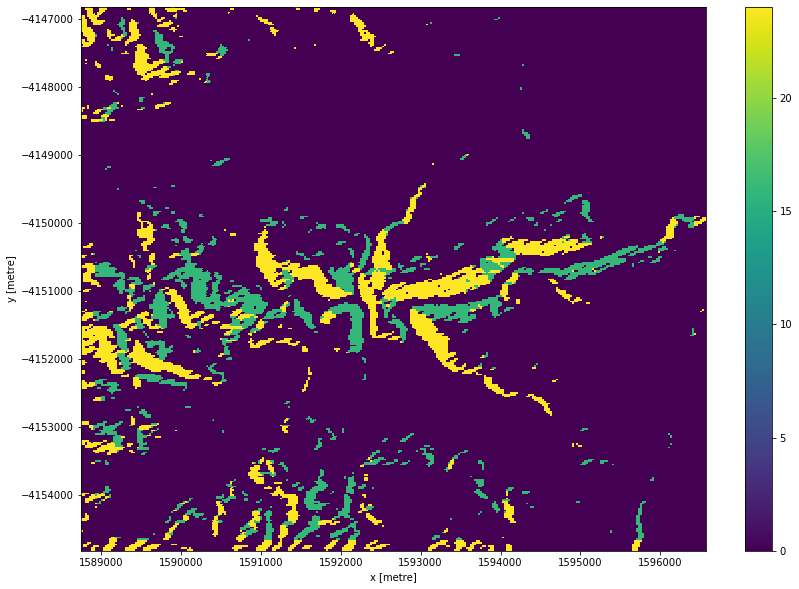

In [35]:
terrain_mask2.plot(figsize =(14,10))

In [34]:
terrain_mask2 = terrain_mask.where(terrain_mask>8,0)

In [50]:
terrain_mask2 = terrain_mask.where(terrain_mask>8,0)
buff_terrain = xr.DataArray(ndimage.binary_dilation(terrain_mask2, iterations=2).astype(terrain_mask2.dtype),dims=('y', 'x'))
terrain_mask['buff'] = buff_terrain

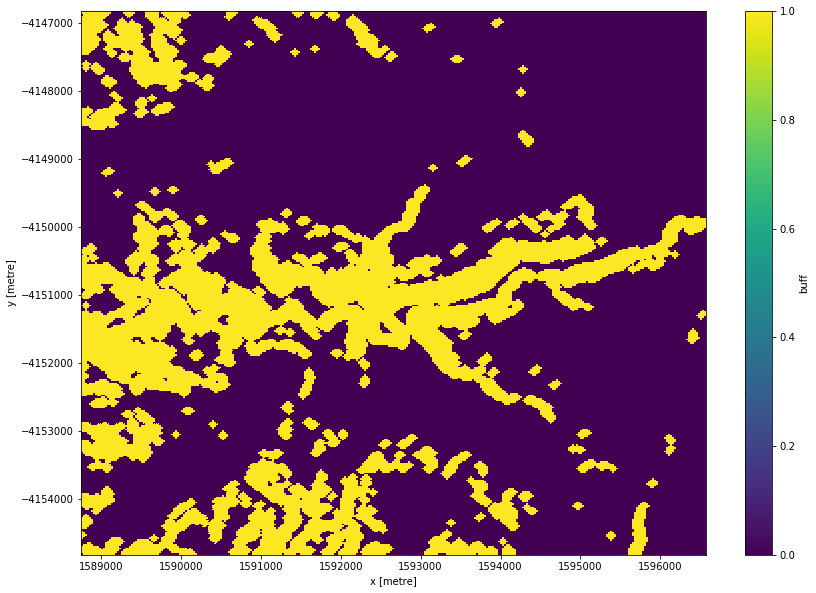

In [51]:
terrain_mask.buff.plot(figsize =(14,10))

In [15]:
Data_out = data_lst8.isel(time=10)
Data_out['terrain_mask']=terrain_mask.astype('int16')
Data_out

<xarray.Dataset>
Dimensions:          (x: 313, y: 320)
Coordinates:
    time             datetime64[ns] 2018-08-22T23:50:11
  * y                (y) float64 -4.147e+06 -4.147e+06 ... -4.155e+06 -4.155e+06
  * x                (x) float64 1.589e+06 1.589e+06 ... 1.597e+06 1.597e+06
Data variables:
    coastal_aerosol  (y, x) int16 593 842 1063 1113 926 ... 688 690 691 707 720
    blue             (y, x) int16 405 595 739 775 669 ... 503 504 503 515 510
    green            (y, x) int16 332 490 613 640 631 ... 349 350 351 350 354
    red              (y, x) int16 253 366 456 509 568 ... 211 213 215 217 214
    nir              (y, x) int16 1221 1939 2325 2357 2702 ... 130 131 136 139
    swir1            (y, x) int16 426 646 895 894 1353 1353 ... 36 35 34 36 34
    swir2            (y, x) int16 218 291 355 430 659 659 ... 17 18 20 21 20 23
    terrain_mask     (y, x) int16 8 8 24 24 24 8 8 8 8 24 ... 8 8 8 8 8 8 8 8 8
Attributes:
    crs:      EPSG: 3577

In [16]:
#write_geotiff('/g/data/u46/users/ck9738/Datasets/Tasselled_cap_tifs/Pambula_terrain_mask.20180222.tif',Data_out)